In [564]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [565]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")

train=data[0:1460]
test=data[1460:]

target='SalePrice'
train['SalePrice'].describe()


#shapes of the data
print("Train data shaspe:", train.shape)
print ("Test data shape:", test.shape)

train.head()

Train data shaspe: (1460, 82)
Test data shape: (1470, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


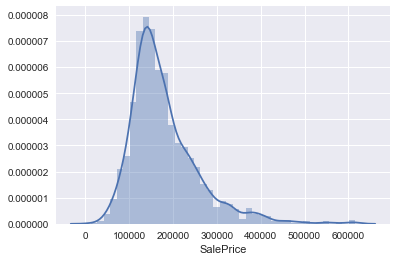

In [566]:
sns.distplot(train['SalePrice'])

# Comment: non-normality will be adressed later; positive skewness

In [567]:
#Skewness and Kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())



Skewness: 1.622940
Kurtosis: 4.159971


New Skew: -0.072434


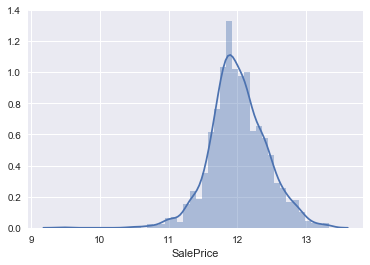

In [568]:
target=np.log(train['SalePrice'])
print("New Skew: %f" % target.skew())
sns.distplot(target)

# visible improvement of the data

In [569]:
# Now feature selection

# Compute the pairwise correlation coefficients, in sorted order
corrmat= train.corr()
sorted_corr=corrmat['SalePrice'].abs().sort_values()
print(sorted_corr[sorted_corr>0.3])



Bsmt Full Bath    0.314536
Wood Deck SF      0.319104
Open Porch SF     0.344383
Lot Frontage      0.365075
TotRms AbvGrd     0.483701
Fireplaces        0.485683
BsmtFin SF 1      0.513160
Mas Vnr Area      0.516852
Full Bath         0.518194
Year Remod/Add    0.545219
Garage Yr Blt     0.561873
Year Built        0.591436
1st Flr SF        0.657119
Garage Area       0.662397
Garage Cars       0.663485
Total Bsmt SF     0.683037
Gr Liv Area       0.698990
Overall Qual      0.804562
SalePrice         1.000000
Name: SalePrice, dtype: float64


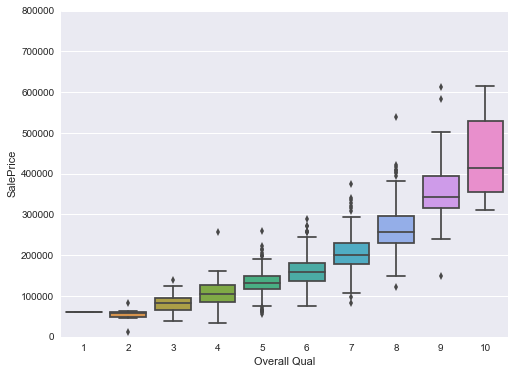

In [570]:
# Let's look into Overall Qual feature, 

df_train=pd.concat([train['SalePrice'],train['Overall Qual']],axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Overall Qual', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);


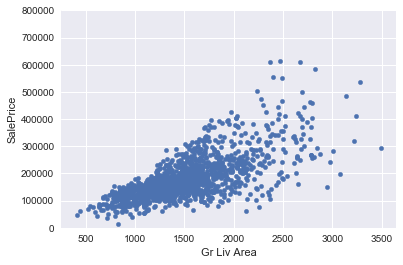

In [571]:
# Next, scatter plot for GrLivArea vs SalesPrice

df_train= pd.concat([train['SalePrice'],train['Gr Liv Area']],axis=1)
df_train.plot.scatter(x='Gr Liv Area', y='SalePrice', ylim=(0,800000));

#homoscedasticity here, transform

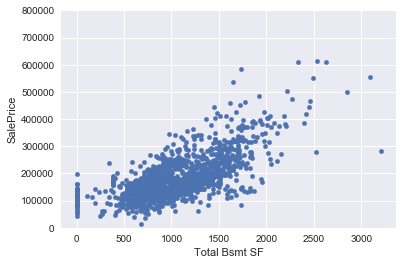

In [572]:
# next, 
df_train= pd.concat([train['SalePrice'],train['Total Bsmt SF']],axis=1)
df_train.plot.scatter(x='Total Bsmt SF', y='SalePrice', ylim=(0,800000));



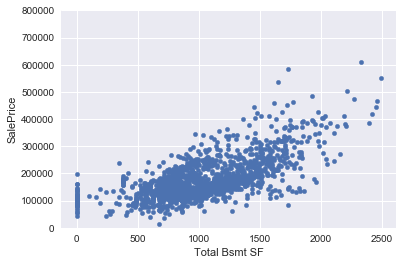

In [573]:
# remove some outliers and plot again

train=train[train["Total Bsmt SF"]<2500]

df_train= pd.concat([train['SalePrice'],train['Total Bsmt SF']],axis=1)
df_train.plot.scatter(x='Total Bsmt SF', y='SalePrice', ylim=(0,800000));


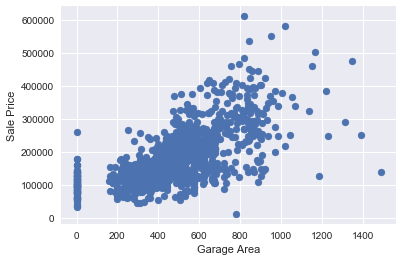

In [574]:
plt.scatter(x=train['Garage Area'],y=train['SalePrice'])
                                    
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

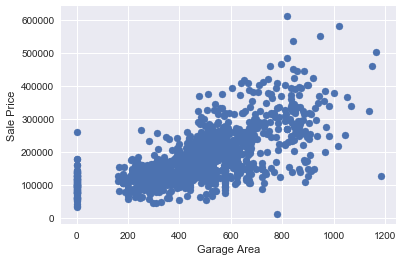

In [575]:
# remove garage outliers
train=train[train['Garage Area']<1200]

plt.scatter(x=train['Garage Area'],y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


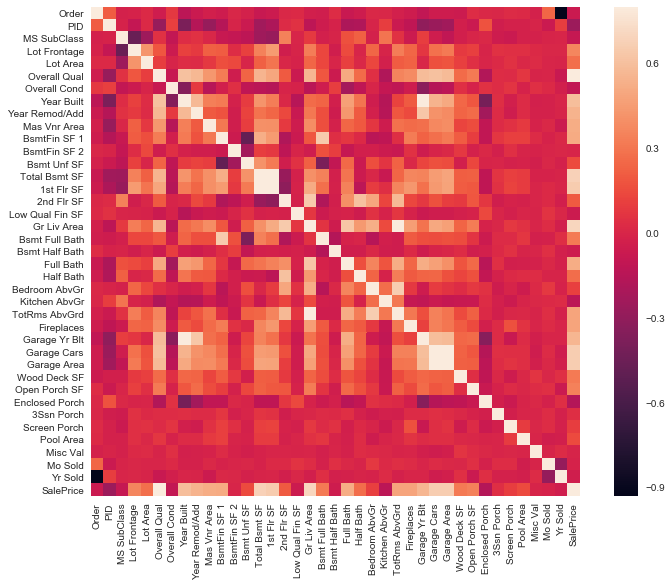

In [576]:
# 2. lets draw a HeatMap for corr matrix to check for collinearity

plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8, square=True)



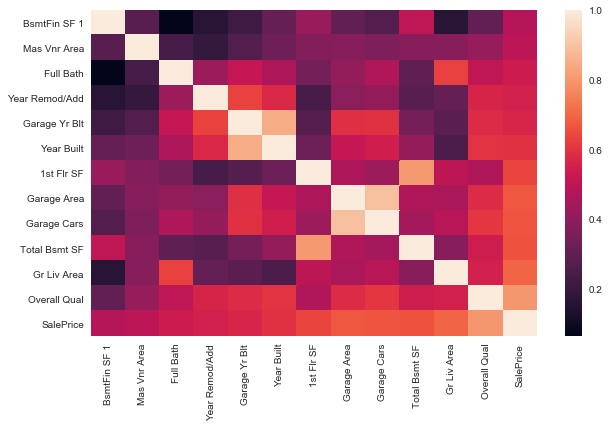

In [577]:
# 3. lets zoom in and isolate top 10 features
# below are top, corr>0.6,variables with SalePrice

plt.figure(figsize=(10,6))
strong_corrs=sorted_corr[sorted_corr>0.5]
corrmat=train[strong_corrs.index].corr()
sns.heatmap(corrmat)
plt.show()



In [578]:
# Some analysis:

# 1.GarageArea and Garagecarsmrepresent the same things
# keep GarageCars since corr is higher

# 2. TotalBsmtSF' and '1stFloor', keep TotalBsmtSF

# 3. TotRmsAbvGrd' and 'GrLivArea are again repetitive, keep GrLivArea


# Now we are left with relevant columns


#  train['years_until_remod']=train['Year Remod/Add'] - train['Year Built']

# drop redundant columns


corrmat= train.corr()
sorted_corrs=corrmat['SalePrice'].abs().sort_values()

strong_corrs= sorted_corrs[sorted_corrs>0.3]


final_corr_cols= sorted_corrs.drop(['Garage Area','TotRms AbvGrd','1st Flr SF','Garage Yr Blt'])

# final features
features = final_corr_cols.drop(['SalePrice']).index

train[features].head()





,Mo Sold,BsmtFin SF 2,Misc Val,Yr Sold,3Ssn Porch,Bsmt Half Bath,Low Qual Fin SF,Order,Screen Porch,MS SubClass,...,BsmtFin SF 1,Mas Vnr Area,Full Bath,Year Remod/Add,Year Built,Total Bsmt SF,Garage Cars,Gr Liv Area,Overall Qual,Pool Area
0,5,0.0,0,2010,0,0.0,0,1,0,20,...,639.0,112.0,1,1960,1960,1080.0,2.0,1656,6,0
1,6,144.0,0,2010,0,0.0,0,2,120,20,...,468.0,0.0,1,1961,1961,882.0,1.0,896,5,0
2,6,0.0,12500,2010,0,0.0,0,3,0,20,...,923.0,108.0,1,1958,1958,1329.0,1.0,1329,6,0
3,4,0.0,0,2010,0,0.0,0,4,0,20,...,1065.0,0.0,2,1968,1968,2110.0,2.0,2110,7,0
4,3,0.0,0,2010,0,0.0,0,5,0,60,...,791.0,0.0,2,1998,1997,928.0,2.0,1629,5,0


In [579]:

#train['years_until_remod']=train['Year Remod/Add'] - train['Year Built']

#test['years_until_remod']=test['Year Remod/Add'] - test['Year Built']


# handling missing/null values on data

total = train[features].isnull().sum().sort_values(ascending=False)
percent = (train[features].isnull().sum()/train[features].isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(80)


,Total,Percent
2nd Flr SF,0,0.000000
3Ssn Porch,0,0.000000
Bedroom AbvGr,0,0.000000
Bsmt Full Bath,0,0.000000
Bsmt Half Bath,0,0.000000
Bsmt Unf SF,0,0.000000
BsmtFin SF 1,0,0.000000
BsmtFin SF 2,0,0.000000
Enclosed Porch,0,0.000000
Fireplaces,0,0.000000


In [580]:
# drop below feature
#features=features.drop(["Lot Frontage"])

In [581]:
#Check for missing data in previously selected columns, on train

# interpolate missing values but can also replace with mean
data = train[features].select_dtypes(include=[np.number]).interpolate().dropna() 

train[features]=data

sum(train[features].isnull().sum() != 0)


0

In [582]:
# check again 
total = train[features].isnull().sum().sort_values(ascending=False)
percent = (train[features].isnull().sum()/train[features].isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(80)

,Total,Percent
2nd Flr SF,0,0.0
3Ssn Porch,0,0.0
Bedroom AbvGr,0,0.0
Bsmt Full Bath,0,0.0
Bsmt Half Bath,0,0.0
Bsmt Unf SF,0,0.0
BsmtFin SF 1,0,0.0
BsmtFin SF 2,0,0.0
Enclosed Porch,0,0.0
Fireplaces,0,0.0


In [583]:

#train_null_counts= train[features].isnull().sum()

#df_missing_values = train[train_null_counts[(train_null_counts>0)].index]

#float_cols = df_missing_values.select_dtypes(include=['float'])

#features = float_cols.fillna(df_missing_values.mean())
#print(features.isnull().sum())


In [584]:
# Check for outliers in our new 'new_train' data; nothing our of the ordinary

saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)




outer range (low) of the distribution:
[[-2.19999173]
 [-1.90548877]
 [-1.86553089]
 [-1.78428318]
 [-1.77096388]
 [-1.75098494]
 [-1.70252934]
 [-1.67772881]
 [-1.63777092]
 [-1.63777092]]

outer range (high) of the distribution:
[[ 3.64932369]
 [ 3.75654402]
 [ 3.78318262]
 [ 3.86309839]
 [ 4.08952643]
 [ 4.31378342]
 [ 4.79544912]
 [ 4.98191927]
 [ 5.39392506]
 [ 5.77650852]]


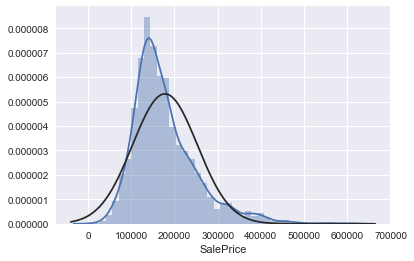

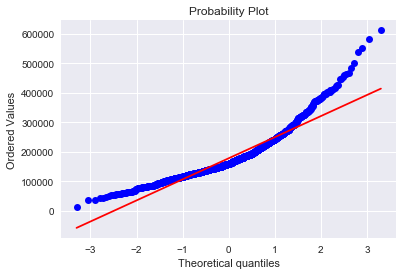

In [585]:
#histogram and normal probability plot

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [586]:
# lets transform above to normal dist. since skew is positive
# we can use log transform

y=np.log(train['SalePrice'])
X = train[features]

In [587]:
# Let's fin Mul. lin Reg

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#'Total Bsmt SF' is wrong

model= lr.fit(X_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_train.shape

[ -3.40815757e-03  -1.72971987e+03   5.63838322e-07   3.17244991e-02
   4.82434354e-05  -4.15186351e-03  -2.20080499e-05   7.29701547e-05
   2.40360056e-04  -1.61378236e-04   5.28252361e-02  -3.36735522e-03
  -6.07007828e-02  -1.72971988e+03   2.10709475e-04  -4.26240576e-06
  -5.88897819e-11   6.51522748e-06   5.32426729e-03   3.35657743e-02
   2.73342470e-05   3.99141557e-04   8.66929140e-05   1.88557882e-02
  -1.72971982e+03   6.22234706e-06   5.06207921e-03   1.08971072e-03
   3.48997604e-03   1.72972002e+03   4.58507273e-02   2.70554314e-04
   8.10537337e-02   0.00000000e+00]
-62.2562536771


(969,)

In [588]:
print("Test R^2 is: \n", model.score(X_test,y_test))

print(" Train R^2 is: \n", model.score(X_train,y_train))

Test R^2 is: 
 0.864608625538
 Train R^2 is: 
 0.903287085138


In [589]:
test_predictions= model.predict(X_test)
train_predictions = model.predict(X_train)

print ('Test MSE is:', mean_squared_error(y_test, test_predictions))
test_rmse_2 = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test RMSE is:', test_rmse_2)

#print('Train MSE is:', mean_squared_error(y_train,train_predictions))
#train_rmse_2= np.sqrt(mean_squared_error(y_train,train_predictions))
#print('Train RMSE is:',train_rmse_2)

#test_predictions = model.predict(clean_test[features])

Test MSE is: 0.0207752639639
Test RMSE is: 0.144136268732


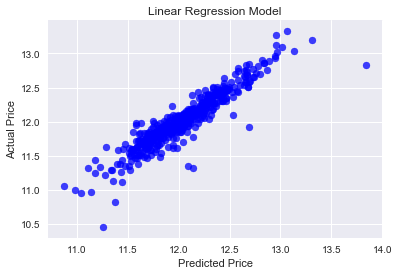

In [590]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

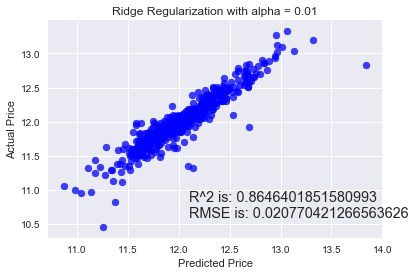

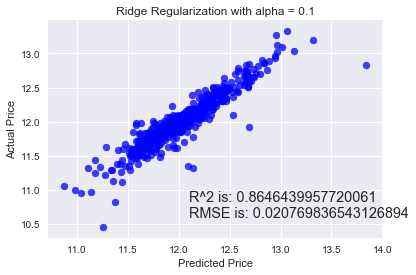

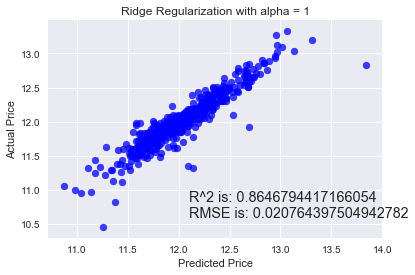

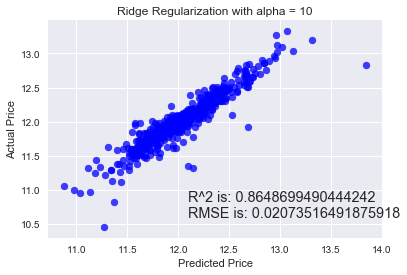

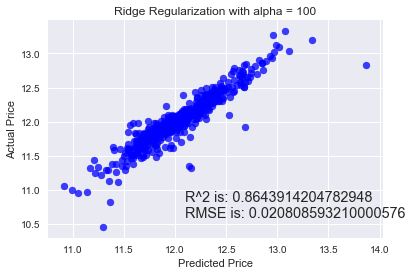

In [591]:
from sklearn.linear_model import Ridge

for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()